In [1]:
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
library("pheatmap")
results="/sharedFolder/Results/Idelalisib"
previousResults="/sharedFolder/Results/Hotspot/"
library("ggVennDiagram");
library("ggplot2")
library("vioplot")
library(eulerr)


Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
#Venn diagram plot. Check how many hotspot are in common
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
types=c("Idelalisib")
conditions=c("DMSO","Taze","Vale")
for(j in types){
subBase=Database[grep(j,Database[,6]),]
x <- list()
count=1
for(i in conditions){
x[[count]]=subBase[grep(i,subBase[,6]),7]
count=count+1
}
names(x)=conditions
print(j)
print(x) 
system("echo yeah")
}
jjj=(unlist(x))
j2=x

[1] "Idelalisib"
$DMSO
 [1] 702 158 717 722 752 755 761 767 774 776 779 792 795 120 806 807 808 809 814
[20] 816 819 820 821 823 824 838 841 845 263 848 861 862 867 871 874 881 882 884
[39] 888 890 892 893 901 904 905 906 462 916

$Taze
 [1] 702 478 158 714 717 719 720 722 745 748 752 755 170 761 767 772 774 776 779
[20] 792 795 796 806 807 808 809 813 814 816 819 821 823 824 841 845 263 848 852
[39] 197 861 862 867 871 874 876 881 882 884 276 888 890 892 893 214 902 904 905
[58] 906 462

$Vale
 [1] 702 478 717 719 722 225 732 733 745 752 753 755 761 534 766 767 772 774 776
[20] 779 792 795 796 799 802 806 807 808 809 813 814 819 820 821 823 824 836 837
[39] 838 840 841 845 263 848 851 852 861 862 867 871 874 876 882 884 276 888 890
[58] 892 893 904 905 906 462



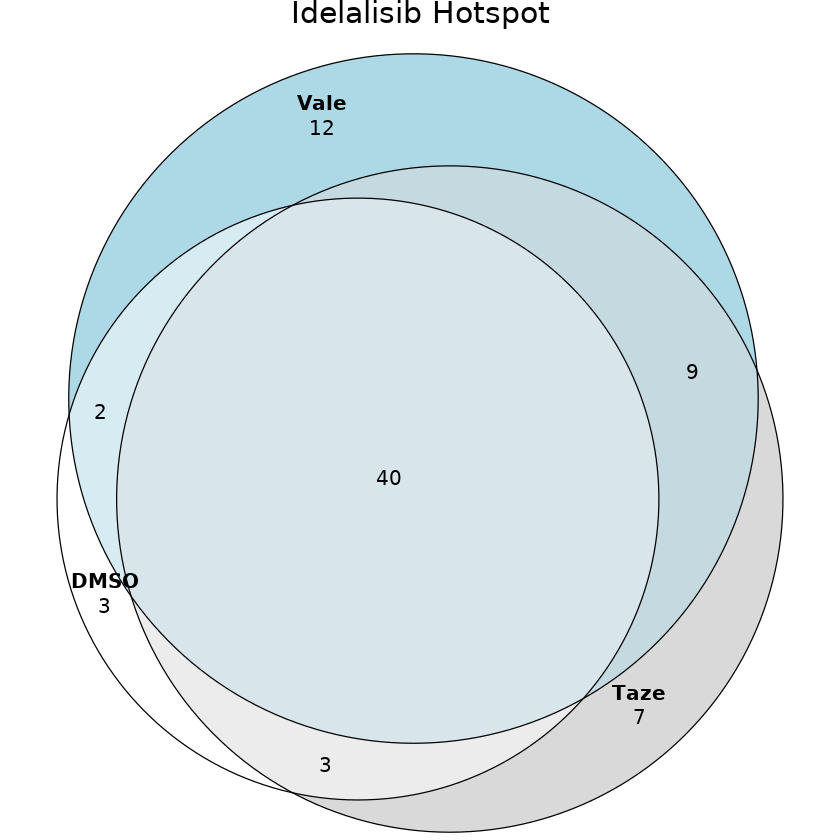

In [3]:
 
fit1 <- euler(c("DMSO" = length(setdiff(setdiff(j2$DMSO,j2$Taze),j2$Vale)), "Taze" = length(setdiff(setdiff(j2$Taze,j2$DMSO),j2$Vale)), "Vale" = length(setdiff(setdiff(j2$Vale,j2$Taze),j2$DMSO)),"DMSO&Taze&Vale"=length(intersect(intersect(j2$DMSO,j2$Taze),j2$Vale)),"DMSO&Taze"=length(setdiff(intersect(j2$DMSO,j2$Taze),j2$Vale)),"DMSO&Vale"=length(setdiff(intersect(j2$DMSO,j2$Vale),j2$Taze)),"Taze&Vale"=length(setdiff(intersect(j2$Taze,j2$Vale),j2$DMSO)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")


In [4]:
DMSOSpec=setdiff(setdiff(x$DMSO,x$Vale),x$Taze)
TazeSpec=setdiff(setdiff(x$Taze,x$DMSO),x$Vale)
ValeSpec=setdiff(setdiff(x$Vale,x$DMSO),x$Taze)
TazVale=setdiff(intersect(x$Taze,x$Vale),x$DMSO)
TazDMSO=setdiff(intersect(x$Taze,x$DMSO),x$Vale)
DMSOVale=setdiff(intersect(x$ Vale,x$DMSO),x$Taze)
common=intersect(intersect(x$ Vale,x$DMSO),x$Taze)
#inter=intersect(intersect(x$DMSO,x$Vale),x$Taze)

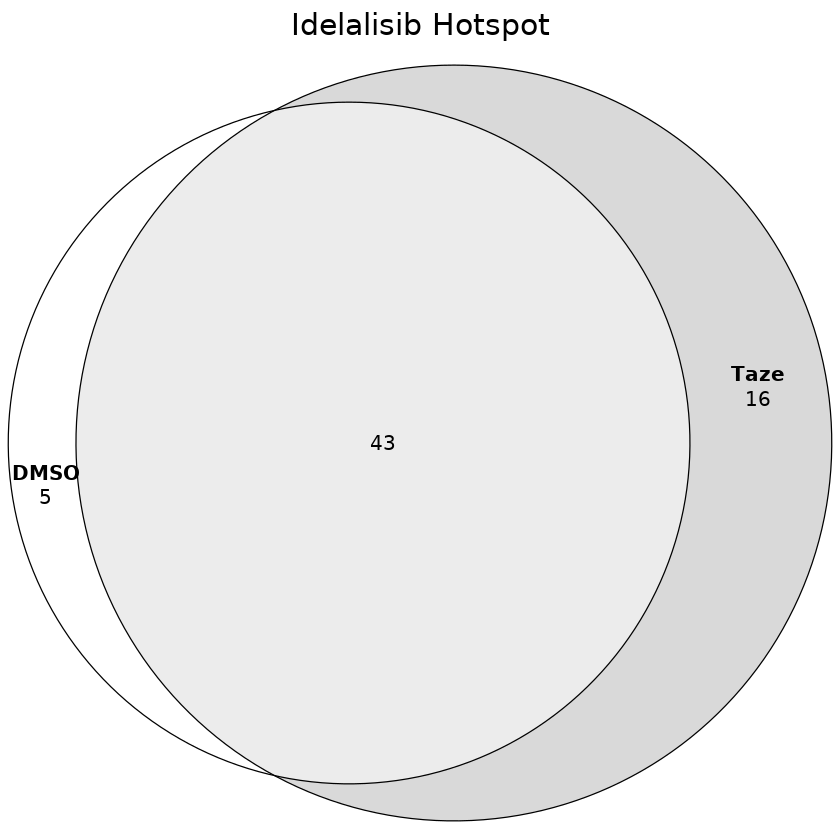

In [3]:
fit1 <- euler(c("DMSO" = length(setdiff(j2$DMSO,j2$Taze)), "Taze" = length(setdiff(j2$Taze,j2$DMSO)),"DMSO&Taze"=length(intersect(j2$DMSO,j2$Taze)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")


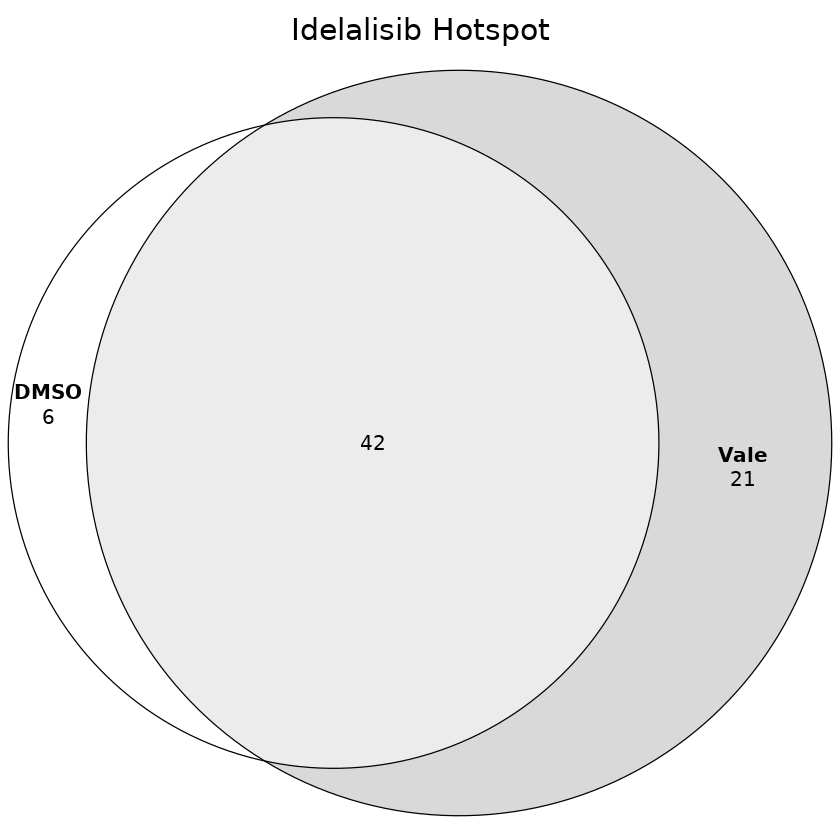

In [6]:
fit1 <- euler(c("DMSO" = length(setdiff(j2$DMSO,j2$Vale)), "Vale" = length(setdiff(j2$Vale,j2$DMSO)),"DMSO&Vale"=length(intersect(j2$DMSO,j2$Vale)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")

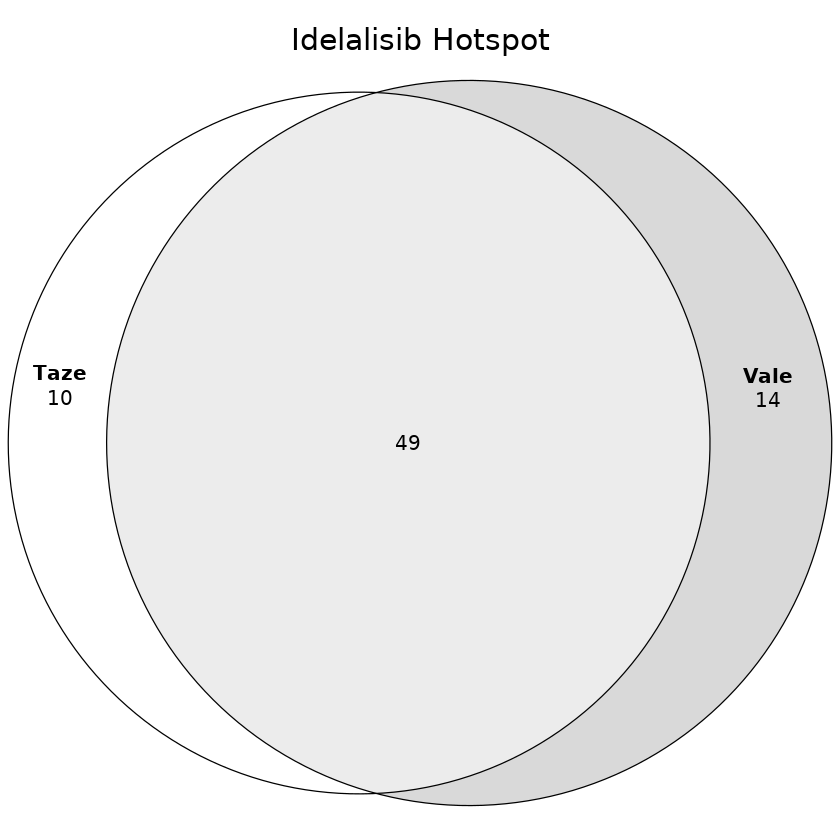

In [5]:
fit1 <- euler(c("Taze" = length(setdiff(j2$Taze,j2$Vale)), "Vale" = length(setdiff(j2$Vale,j2$Taze)),"Taze&Vale"=length(intersect(j2$Taze,j2$Vale)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")

In [7]:
#CHECK AID INDEPENDENT HOTSPOT 

In [8]:
mj=list()
count=1
dir.create(paste(results,"/rpmPlot/",sep=""))
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))
temp=a[sapply(setdiff(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Taze,j2$DMSO),toString),c(1,2)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}

mj[[count]]=temp
count=count+1
mj[[count]]=temp2

count=count+1
mj[[count]]=temp3



count=count+1

write.table(rbind(temp,temp2,temp3),paste(results,"/rpmPlot/Lig_DMSOTaze.csv",sep=""),col.names=NA,sep=",",quote=TRUE)



temp=a[sapply(setdiff(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Vale,j2$DMSO),toString),c(1,3)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}


mj[[count]]=temp
count=count+1
mj[[count]]=temp2

count=count+1
mj[[count]]=temp3

count=count+1
write.table(rbind(temp,temp2,temp3),paste(results,"/rpmPlot/Lig_DMSOVale.csv",sep=""),col.names=NA,sep=",",quote=TRUE)





Warning message in dir.create(paste(results, "/rpmPlot/", sep = "")):
“'/sharedFolder/Results/Idelalisib/rpmPlot' already exists”


Warning message:
“Removed 1 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


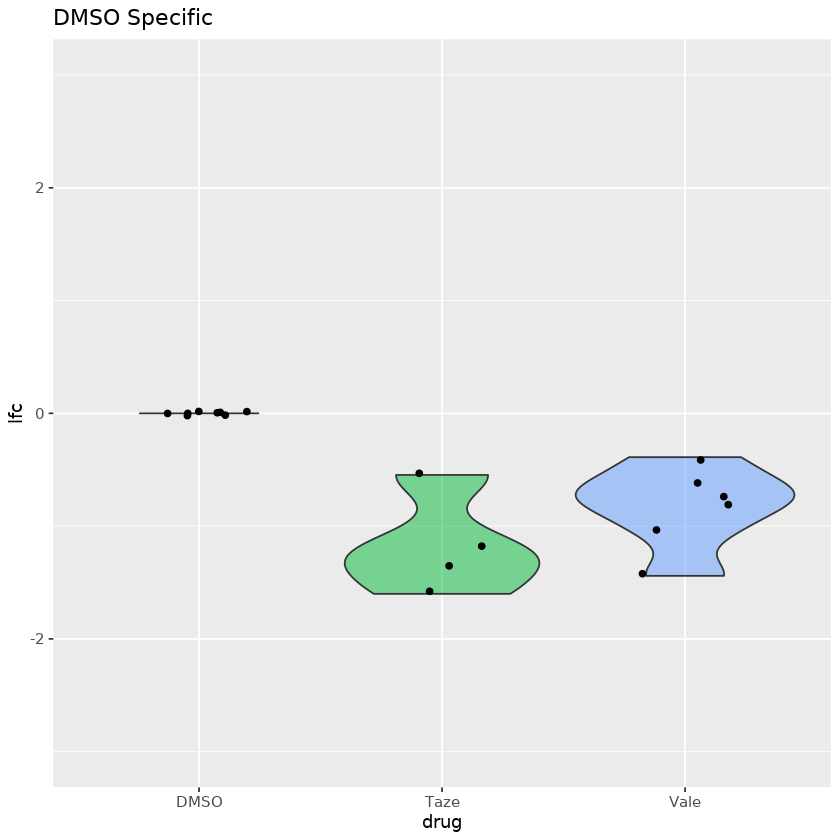

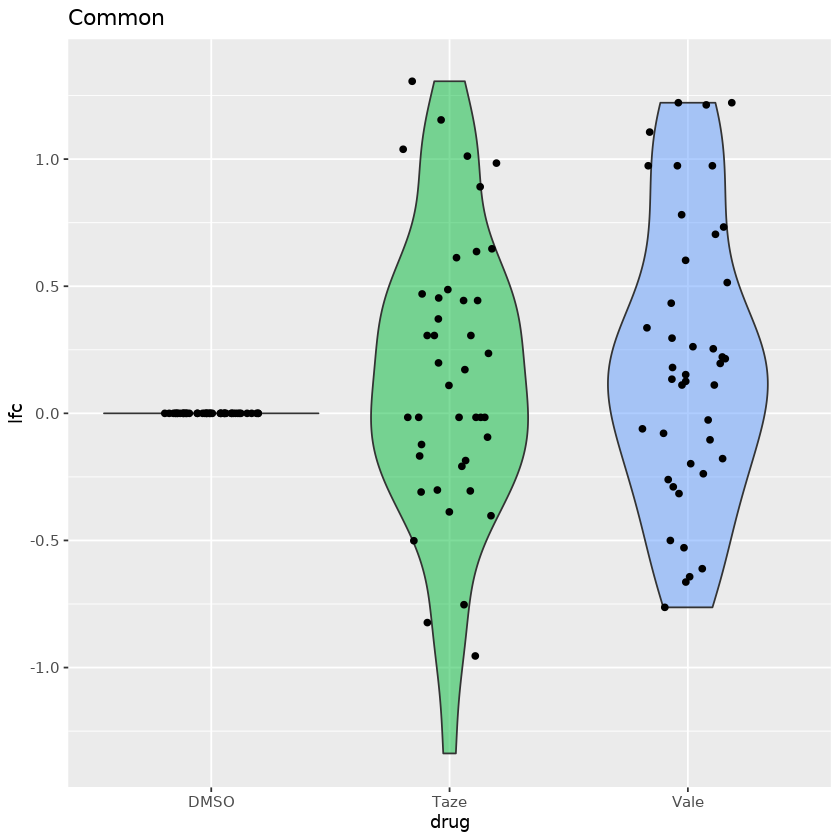

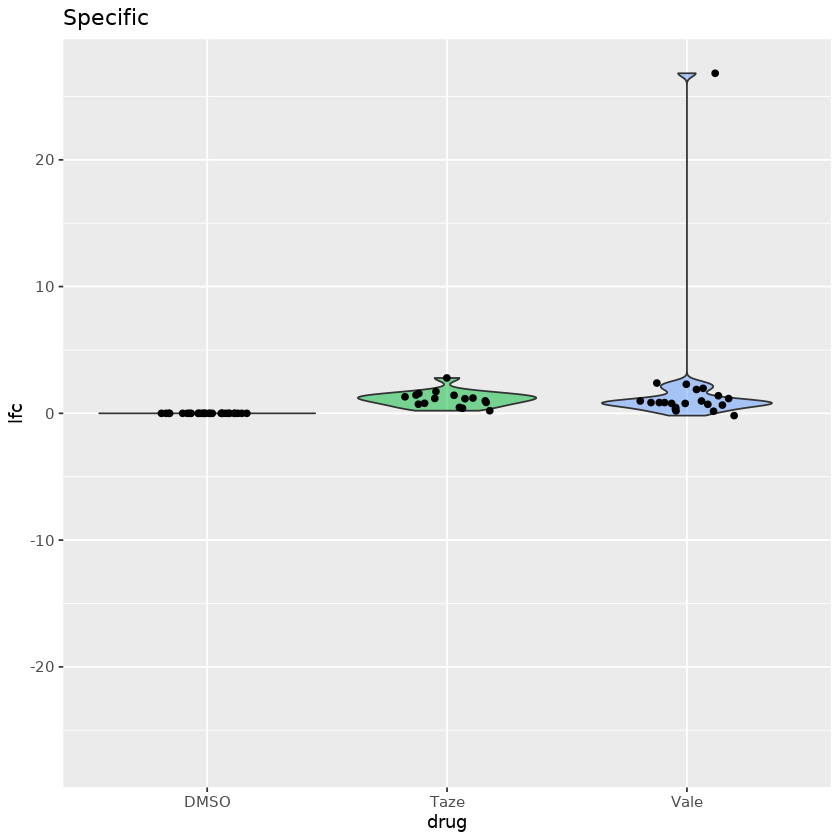

In [9]:
nn=c("DMSO Specific","Common","Specific")
countnn=1
for(i in seq(count/2)){
foldChange=list()
foldChange[[1]]=log2((mj[[i]][,2]+0.000001)/(mj[[i]][,1]+0.000001))
foldChange[[2]]=log2((mj[[i+3]][,2]+0.000001)/(mj[[i+3]][,1]+0.000001))
    names(foldChange)=c(colnames(mj[[i]])[2],colnames(mj[[i+3]])[2])
    lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
#vioplot(foldChange,main=nn[countnn],col = 3:length(levels(foldChange)),ylim=c(-lim,lim))
    foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle(nn[countnn])
plot(pp)    
    countnn=countnn+1
}

In [10]:
names(mj)=c("DMSO_spec_vsTaze","DMSO_TAZE","TazeSPec","DMSO_spec_vsVale","DMSOVale","ValeSpec")
dir.create(paste(results,"/rpmPlot/sortNames/",sep=""))
for(i in seq(length(mj))){
write.table(rownames(mj[[i]]),paste(results,"/rpmPlot/sortNames/_",i,"_",names(mj)[i],".csv",sep=""),col.names=FALSE,row.names=FALSE)
}

Warning message in dir.create(paste(results, "/rpmPlot/sortNames/", sep = "")):
“'/sharedFolder/Results/Idelalisib/rpmPlot/sortNames' already exists”


In [11]:
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))+0.000001
yo=cbind(a[,2]/a[,1],a[,3]/a[,1])
colnames(yo)=c("Taze","Vale")
write.table(log10(yo),paste(results,"/rpmPlot","/lfcBoxplot.txt",sep=""),sep=",",row.names=FALSE)


In [12]:
write.table(a[sapply(c(TazeSpec,TazVale,ValeSpec,common,TazDMSO,DMSOVale,DMSOSpec),toString),],paste(results,"rpmPlot/rpm_hgtgtsHeatmapDIVIDED.csv",sep="/"),col.names=NA,sep=",")

In [13]:
TazeSpec

[1] 714 720 748 170 197 214 902

In [14]:
TazVale

[1] 478 719 745 772 796 813 852 876 276

In [15]:
ValeSpec

[1] 225 732 733 753 534 766 799 802 836 837 840 851

In [16]:
common

[1] 702 717 722 752 755 761 767 774 776 779 792 795 806 807 808 809 814 819 821
[20] 823 824 841 845 263 848 861 862 867 871 874 882 884 888 890 892 893 904 905
[39] 906 462

In [17]:
listHot1=names(sort(log10(yo)[,1],decreasing=TRUE))[seq(1,10)]
listHot2=names(sort(log10(yo)[,2],decreasing=TRUE))[seq(1,10)]
f="Idelalisib_Taze"
Database=unique(read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")[,c(1,2,3,7)])
rownames(Database)=Database[,4]
DBTU=Database[sapply(listHot1,FUN=toString),]
bigOne=read.table("/sharedFolder/Results/RPMCOmparison/count_hgtgts.csv",header=TRUE,row.names=1,sep=",")

rmarkdown=matrix(ncol=1)
rmarkdown=rbind(rmarkdown,"---")
rmarkdown=rbind(rmarkdown,'title: "Hotspots"')
rmarkdown=rbind(rmarkdown,"---")
#write batch file 
batch=matrix(ncol=1)
countings=matrix(ncol=2)


colnames(countings)=c("HotspotBelonging","RPM")


for(i in seq(1,nrow(DBTU))){
temp=(DBTU[i,3]-DBTU[i,2])*10
batch=rbind(batch,paste("goto ",DBTU[i,1],":",(DBTU[i,2]-temp),"-",(DBTU[i,3]+temp),sep=""))
batch=rbind(batch,paste("snapshot ",i,".png",sep=""))
t=cbind(colnames(bigOne),t(bigOne[rownames(DBTU)[i],]))

colnames(t)=c("HotspotBelonging","RPM")
rownames(t)<-NULL
countings=rbind(countings,t)


#markdown
    
johnTemp=" "
for(sd in seq(1,nrow(t))){
johnTemp=paste(johnTemp,"<br>",paste(t[sd,],collapse=" "),sep="")
}


    
rmarkdown=rbind(rmarkdown,paste("## ",rownames(DBTU)[i],sep=""))
rmarkdown=rbind(rmarkdown,paste("![",johnTemp,"](./",i,".png",")",sep=""))
rmarkdown=rbind(rmarkdown," ")

}
batch=batch[-1,]
write.table(batch,paste(results,"/",f,".batch",sep=""),col.names=FALSE,row.names=FALSE,sep="\t",quote=FALSE)
rmarkdown=rmarkdown[-1,]
write.table(rmarkdown,paste(results,"/",f,".rmd",sep=""),row.names=FALSE,col.names=FALSE,quote=FALSE)

In [18]:
f="Idelalisib_Vale"
Database=unique(read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")[,c(1,2,3,7)])
rownames(Database)=Database[,4]
DBTU=Database[sapply(listHot2,FUN=toString),]
bigOne=read.table("/sharedFolder/Results/RPMCOmparison/count_hgtgts.csv",header=TRUE,row.names=1,sep=",")

rmarkdown=matrix(ncol=1)
rmarkdown=rbind(rmarkdown,"---")
rmarkdown=rbind(rmarkdown,'title: "Hotspots"')
rmarkdown=rbind(rmarkdown,"---")
#write batch file 
batch=matrix(ncol=1)
countings=matrix(ncol=2)


colnames(countings)=c("HotspotBelonging","RPM")


for(i in seq(1,nrow(DBTU))){
temp=(DBTU[i,3]-DBTU[i,2])*10
batch=rbind(batch,paste("goto ",DBTU[i,1],":",(DBTU[i,2]-temp),"-",(DBTU[i,3]+temp),sep=""))
batch=rbind(batch,paste("snapshot ",i,".png",sep=""))
t=cbind(colnames(bigOne),t(bigOne[rownames(DBTU)[i],]))

colnames(t)=c("HotspotBelonging","RPM")
rownames(t)<-NULL
countings=rbind(countings,t)


#markdown
    
johnTemp=" "
for(sd in seq(1,nrow(t))){
johnTemp=paste(johnTemp,"<br>",paste(t[sd,],collapse=" "),sep="")
}


    
rmarkdown=rbind(rmarkdown,paste("## ",rownames(DBTU)[i],sep=""))
rmarkdown=rbind(rmarkdown,paste("![",johnTemp,"](./",i,".png",")",sep=""))
rmarkdown=rbind(rmarkdown," ")

}
batch=batch[-1,]
write.table(batch,paste(results,"/",f,".batch",sep=""),col.names=FALSE,row.names=FALSE,sep="\t",quote=FALSE)
rmarkdown=rmarkdown[-1,]
write.table(rmarkdown,paste(results,"/",f,".rmd",sep=""),row.names=FALSE,col.names=FALSE,quote=FALSE)

In [27]:
listHot1
positionList=matrix(ncol=3)
colnames(positionList)=colnames(Database)[c(1,2,3)]
for(i in listHot1){
positionList=rbind(positionList,Database[Database[,4]==i,c(1,2,3)])
}
positionList=positionList[-1,]
positionList

[1] "534" "170" "733" "720" "748" "852" "813" "824" "714" "276"

,Chromosome,ChrStart,ChrEnd
,<chr>,<int>,<int>
534,chr7,108256877,108259812
170,chr6,129224478,129225021
733,chr4,119703490,119708186
720,chr2,127950604,127956079
748,chr5,143661491,143670760
852,chr15,31295180,31297270
813,chr11,99008785,99017510
824,chr12,87026855,87031178
714,chr2,34808633,34820686


In [33]:
listHot2
positionList=matrix(ncol=3)
colnames(positionList)=colnames(Database)[c(1,2,3)]
for(i in listHot2){
positionList=rbind(positionList,Database[Database[,4]==i,c(1,2,3)])
}
positionList=positionList[-1,]
positionList

[1] "534" "851" "753" "733" "852" "276" "767" "890" "702" "813"

,Chromosome,ChrStart,ChrEnd
,<chr>,<int>,<int>
534,chr7,108256877,108259812
851,chr15,27554192,27563004
753,chr6,108609655,108616659
733,chr4,119703490,119708186
852,chr15,31295180,31297270
276,chr16,58715750,58720548
767,chr7,133554067,133558692
890,chr17,8117726,8122852
702,chr1,36351156,36383582


In [31]:
listHot1

[1] "534" "170" "733" "720" "748" "852" "813" "824" "714" "276"

In [32]:
listHot2

[1] "534" "851" "753" "733" "852" "276" "767" "890" "702" "813"